# Cartesian Compressed Sensing (CCS)

In [1]:
%reset -f
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import os
import imageio
import tempfile

import utils
from demo_ccs import *

In [2]:
vmin = 0
vmax = 0.015
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

## Load results.

In [3]:
ref_time  = np.load("results/ccs/reference/time.npy")
reference = np.load("results/ccs/reference/iter_%03d.npy" % (ref_time.size - 1))

In [4]:
fista_params = utils.quality_filter("ccs", "fista", eps=None, verbose=True)
eps = np.load("results/ccs/fista_%3.2fx10^%d/err.npy" % fista_params)[1, -1] + 2

Selected best reconstruction parameters.


In [5]:
(fista_params, fista_aha, fista_conv, fista_time) = utils.get_best_case("ccs", "fista", eps=eps)
fista_iter = [np.load("results/ccs/fista_%3.2fx10^%d/iter_%03d.npy" % \
                      tuple(list(fista_params) + [k]), mmap_mode="r") for k in range(fista_conv.size)]

Selected 4 of 15.
CASE: fista_1.73x10^-4 NRMSE: 14.18%
CASE: fista_1.15x10^-4 NRMSE: 13.61%
CASE: fista_7.70x10^-5 NRMSE: 13.79%
CASE: fista_5.13x10^-5 NRMSE: 14.52%


In [6]:
(ifista_params, ifista_aha, ifista_conv, ifista_time) = utils.get_best_case("ccs", "ifista", eps=eps)
ifista_iter = [np.load("results/ccs/ifista_%3.2fx10^%d_%d/iter_%03d.npy" % \
                       tuple(list(ifista_params) + [k])) for k in range(ifista_conv.size)]

Selected 24 of 75.
CASE: ifista_8.77x10^-4_5 NRMSE: 15.60%
CASE: ifista_8.77x10^-4_6 NRMSE: 15.12%
CASE: ifista_5.85x10^-4_3 NRMSE: 15.23%
CASE: ifista_5.85x10^-4_4 NRMSE: 14.46%
CASE: ifista_5.85x10^-4_5 NRMSE: 14.04%
CASE: ifista_5.85x10^-4_6 NRMSE: 13.81%
CASE: ifista_3.90x10^-4_2 NRMSE: 14.84%
CASE: ifista_3.90x10^-4_3 NRMSE: 13.91%
CASE: ifista_3.90x10^-4_4 NRMSE: 13.62%
CASE: ifista_3.90x10^-4_5 NRMSE: 13.57%
CASE: ifista_3.90x10^-4_6 NRMSE: 13.63%
CASE: ifista_2.60x10^-4_2 NRMSE: 13.78%
CASE: ifista_2.60x10^-4_3 NRMSE: 13.57%
CASE: ifista_2.60x10^-4_4 NRMSE: 13.76%
CASE: ifista_2.60x10^-4_5 NRMSE: 14.05%
CASE: ifista_2.60x10^-4_6 NRMSE: 14.35%
CASE: ifista_1.73x10^-4_2 NRMSE: 13.60%
CASE: ifista_1.73x10^-4_3 NRMSE: 14.05%
CASE: ifista_1.73x10^-4_4 NRMSE: 14.62%
CASE: ifista_1.73x10^-4_5 NRMSE: 15.13%
CASE: ifista_1.73x10^-4_6 NRMSE: 15.55%
CASE: ifista_1.15x10^-4_2 NRMSE: 14.15%
CASE: ifista_1.15x10^-4_3 NRMSE: 15.09%
CASE: ifista_7.70x10^-5_2 NRMSE: 15.18%


In [7]:
(admm_params, admm_aha, admm_conv, admm_time) = utils.get_best_case("ccs", "admm", eps=eps)
admm_iter = [np.load("results/ccs/admm_%3.2fx10^%d_%d/iter_%03d.npy" % \
                     tuple(list(admm_params) + [k])) for k in range(admm_conv.size)]

Selected 16 of 75.
CASE: admm_8.10x10^1_5 NRMSE: 15.27%
CASE: admm_8.10x10^1_6 NRMSE: 14.70%
CASE: admm_2.70x10^1_4 NRMSE: 15.04%
CASE: admm_2.70x10^1_5 NRMSE: 14.44%
CASE: admm_2.70x10^1_6 NRMSE: 14.10%
CASE: admm_9.00x10^0_3 NRMSE: 14.39%
CASE: admm_9.00x10^0_4 NRMSE: 13.95%
CASE: admm_9.00x10^0_5 NRMSE: 13.76%
CASE: admm_9.00x10^0_6 NRMSE: 13.68%
CASE: admm_3.00x10^0_2 NRMSE: 14.02%
CASE: admm_3.00x10^0_3 NRMSE: 13.86%
CASE: admm_3.00x10^0_4 NRMSE: 13.80%
CASE: admm_3.00x10^0_5 NRMSE: 13.93%
CASE: admm_3.00x10^0_6 NRMSE: 14.16%
CASE: admm_1.00x10^0_2 NRMSE: 14.40%
CASE: admm_1.00x10^0_3 NRMSE: 15.08%


In [8]:
(pfista_params, pfista_aha, pfista_conv, pfista_time) = utils.get_best_case("ccs", "pfista", eps=eps)
pfista_iter = [np.load("results/ccs/pfista_%3.2fx10^%d_%d/iter_%03d.npy" % \
                       tuple(list(pfista_params) + [k])) for k in range(pfista_conv.size)]

Selected 18 of 75.
CASE: pfista_1.31x10^-3_4 NRMSE: 15.15%
CASE: pfista_1.31x10^-3_5 NRMSE: 14.81%
CASE: pfista_1.31x10^-3_6 NRMSE: 14.90%
CASE: pfista_8.77x10^-4_3 NRMSE: 14.17%
CASE: pfista_8.77x10^-4_4 NRMSE: 13.85%
CASE: pfista_8.77x10^-4_5 NRMSE: 13.86%
CASE: pfista_8.77x10^-4_6 NRMSE: 14.18%
CASE: pfista_5.85x10^-4_2 NRMSE: 14.20%
CASE: pfista_5.85x10^-4_3 NRMSE: 13.58%
CASE: pfista_5.85x10^-4_4 NRMSE: 13.88%
CASE: pfista_5.85x10^-4_5 NRMSE: 14.38%
CASE: pfista_5.85x10^-4_6 NRMSE: 15.05%
CASE: pfista_3.90x10^-4_2 NRMSE: 13.61%
CASE: pfista_3.90x10^-4_3 NRMSE: 13.99%
CASE: pfista_3.90x10^-4_4 NRMSE: 14.90%
CASE: pfista_2.60x10^-4_2 NRMSE: 13.87%
CASE: pfista_2.60x10^-4_3 NRMSE: 15.07%
CASE: pfista_1.73x10^-4_2 NRMSE: 14.74%


## Plots.

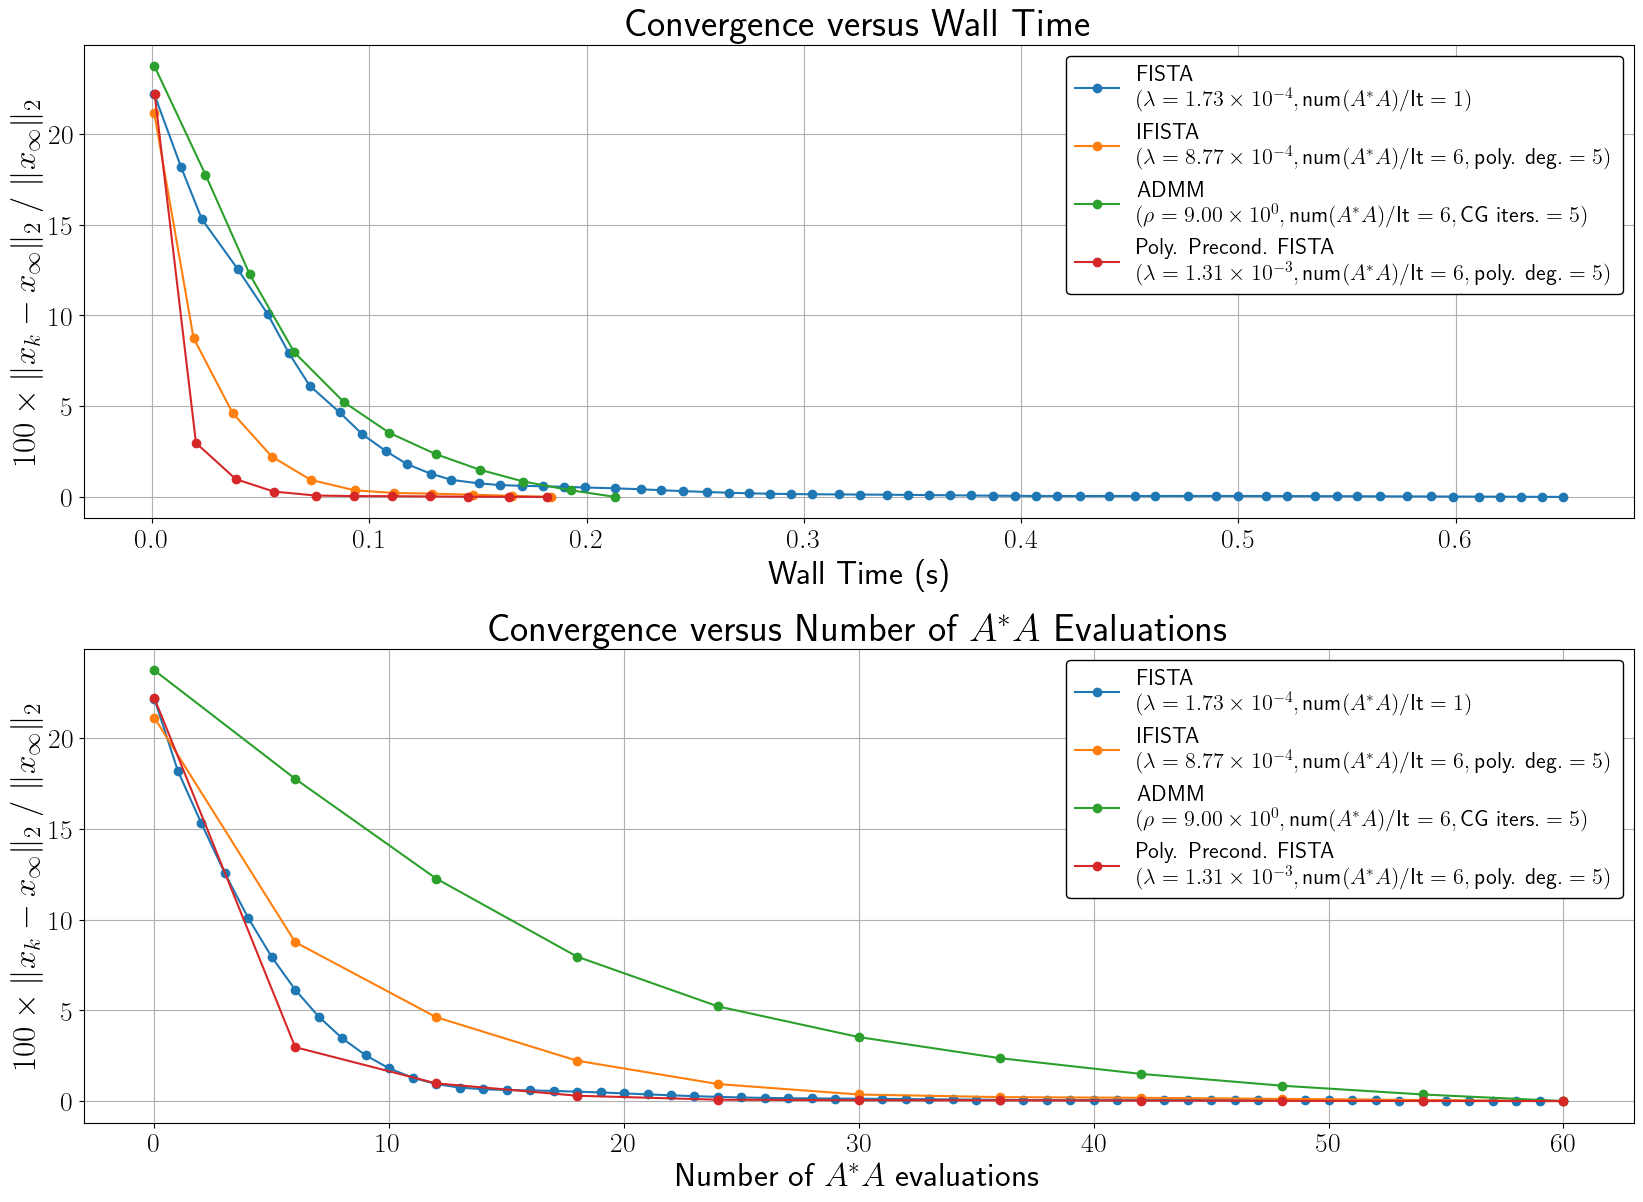

In [9]:
legend = ["FISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=1)$"                                         % fista_params,
          "IFISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{poly. deg.}=%d)$"                % (ifista_params + (ifista_params[-1] - 1,)),
          "ADMM\n$(\\rho=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{CG iters.}=%d)$"                    % (admm_params + (admm_params[-1] - 1,)),
          "Poly. Precond. FISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{poly. deg.}=%d)$" % (pfista_params + (pfista_params[-1] - 1,))]

(fig, axs) = plt.subplots(2, 1, figsize=(20, 14), dpi=100)

axs[0].plot(fista_time,  fista_conv, marker='o')
axs[0].plot(ifista_time, ifista_conv, marker='o')
axs[0].plot(admm_time,   admm_conv, marker='o')
axs[0].plot(pfista_time, pfista_conv, marker='o')
axs[0].set_xlabel("Wall Time (s)", fontsize=24)
axs[0].set_title("Convergence versus Wall Time", fontsize=28)

axs[1].plot(fista_aha,  fista_conv,  marker='o')
axs[1].plot(ifista_aha, ifista_conv, marker='o')
axs[1].plot(admm_aha,   admm_conv,   marker='o')
axs[1].plot(pfista_aha, pfista_conv, marker='o')
axs[1].set_xlabel("Number of $A^*A$ evaluations", fontsize=24)
axs[1].set_title("Convergence versus Number of $A^*A$ Evaluations", fontsize=28)

#ax = inset_axes(axs[1], width="20%", height="50%", borderpad=1, loc="upper center")
#ax.plot(fista_aha,  fista_conv,  marker='o')
#ax.plot(ifista_aha, ifista_conv, marker='o')
#ax.plot(admm_aha,   admm_conv,   marker='o')
#ax.plot(pfista_aha, pfista_conv, marker='o')
#ax.set_xlim([9.5, 60.5])
#ax.set_ylim([-0.25, 2.25])

for ax in axs.ravel():
    ax.set_ylabel("$100 \\times \lVert x_k - x_\infty \\rVert_2 \;/\; \lVert x_\infty \\rVert_2$", fontsize=24)
    ax.legend(legend, ncol=1, fontsize=16, loc="upper right", framealpha=1, edgecolor="black")
    ax.grid()

plt.subplots_adjust(hspace=0.275);

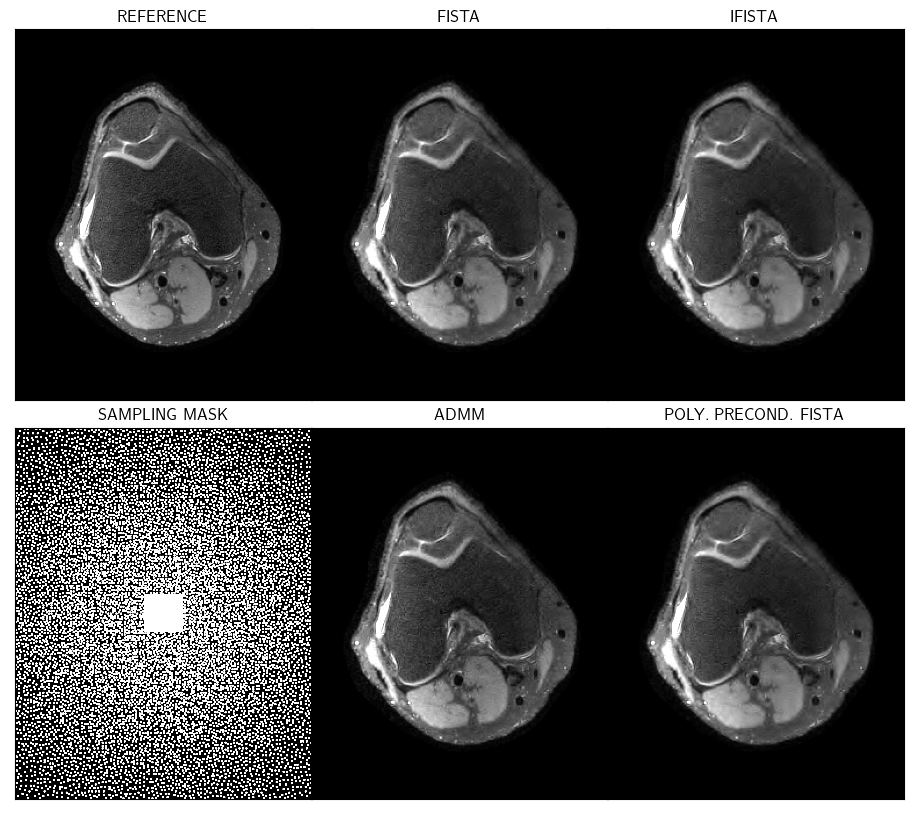

In [10]:
(fig, axs) = plt.subplots(2, 3, figsize=(12, 10), dpi=100)

f = lambda x: x.T/np.linalg.norm(x)
msk = np.load("data/cartesian_knee/msk.npy")

axs[0][0].imshow(np.abs(f(reference)),       cmap="gray", vmin=0, vmax=vmax)
axs[0][1].imshow(np.abs(f(fista_iter[-1])),  cmap="gray", vmin=0, vmax=vmax)
axs[0][2].imshow(np.abs(f(ifista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)
axs[1][0].imshow(np.abs(msk.T),              cmap="gray", vmin=0, vmax=vmax)
axs[1][1].imshow(np.abs(f(admm_iter[-1])),   cmap="gray", vmin=0, vmax=vmax)
axs[1][2].imshow(np.abs(f(pfista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)

axs[0][0].set_title("REFERENCE")
axs[0][1].set_title("FISTA")
axs[0][2].set_title("IFISTA")
axs[1][0].set_title("SAMPLING MASK")
axs[1][1].set_title("ADMM")
axs[1][2].set_title("POLY. PRECOND. FISTA")

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=-0.125, hspace=0.075)

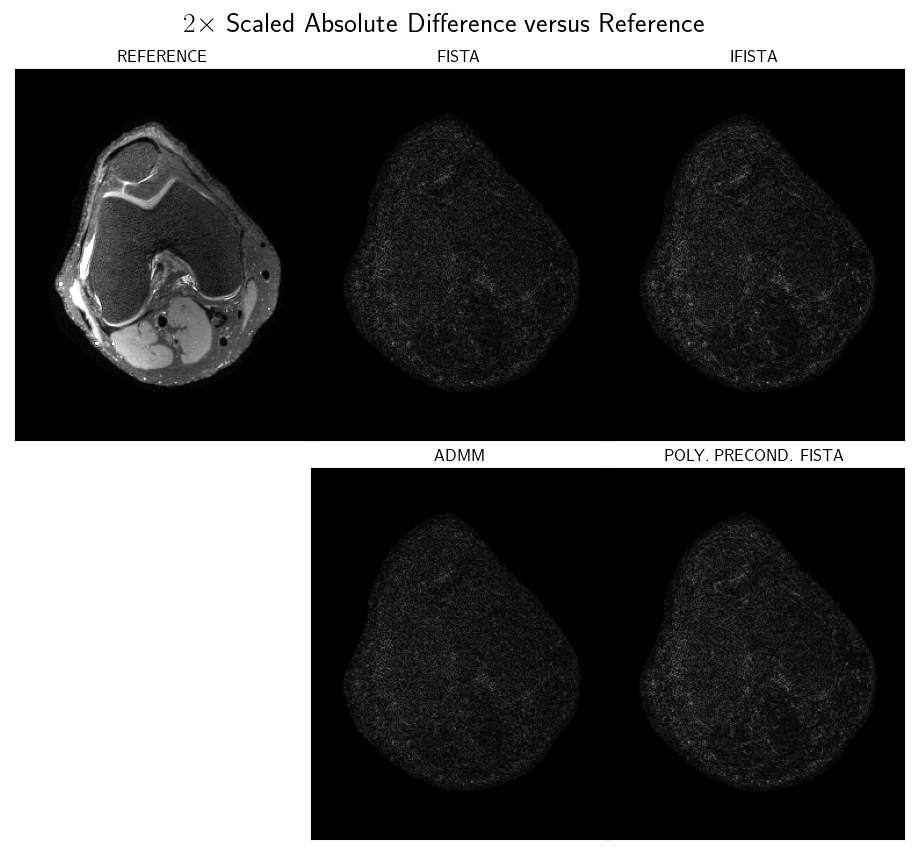

In [11]:
(fig, axs) = plt.subplots(2, 3, figsize=(12, 10), dpi=100)

f = lambda x: x.T/np.linalg.norm(x)

axs[0][0].imshow(np.abs(f(reference)),                      cmap="gray", vmin=0, vmax=vmax)
axs[0][1].imshow(np.abs(f(fista_iter[-1])  - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)
axs[0][2].imshow(np.abs(f(ifista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)

axs[1][1].imshow(np.abs(f(admm_iter[-1])   - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)
axs[1][2].imshow(np.abs(f(pfista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax)

axs[0][0].set_title("REFERENCE")
axs[0][1].set_title("FISTA")
axs[0][2].set_title("IFISTA")

axs[1][1].set_title("ADMM")
axs[1][2].set_title("POLY. PRECOND. FISTA")

axs[1][0].remove()

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(wspace=-0.125, hspace=0.075)
plt.suptitle(r"$2 \times$ Scaled Absolute Difference versus Reference", fontsize=20, y=0.94);

## Video.

In [12]:
with tempfile.TemporaryDirectory() as dirpath:
    for k in range(0, len(pfista_iter)):
        
        num_aha = k * pfista_params[-1]
        x = f(fista_iter[num_aha])
        y = f(pfista_iter[k])
        
        (fig, axs) = plt.subplots(1, 2, figsize=(10, 5), dpi=128)
        axs[0].imshow(np.abs(x), vmin=0, vmax=vmax, cmap="gray")
        axs[1].imshow(np.abs(y), vmin=0, vmax=vmax, cmap="gray")

        for ax in axs.ravel():
            ax.set_xticks([])
            ax.set_yticks([])

        plt.subplots_adjust(wspace=-0.3)
        axs[0].set_xlabel("FISTA", fontsize=24)
        axs[1].set_xlabel("Poly. Precond. FISTA", fontsize=24)
        plt.suptitle("num. $A^*A$: %d" % (num_aha),
                     fontsize=24, x=0.5155)
        plt.savefig(os.path.join(dirpath, "frame_%03d.png" % (k + 1)))
        plt.close()

    writer = imageio.get_writer('videos/ccs.gif', fps=2)
    for k in range(0, len(pfista_iter)):
        im = imageio.v2.imread(os.path.join(dirpath, "frame_%03d.png" % (k + 1)))
        writer.append_data(im)
    writer.close()

## End of notebook.